# 1. Line Clipping

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

inside, left,right,bottom,top=0,1,2,4,8

def compute_outcode(x,y,xmin,ymin,xmax,ymax):
    code = inside
    if x<xmin:
        code|=left
        ''''''
    return code

def cohen_sutherland_line_clipping(x1,y1,x2,y2, xmin,ymin, xmax,ymax):
    o1 = compute_outcode(x1,y1,xmin,ymin,xmax,ymax)
    o2 = compute_outcode(x2,y2,xmin,ymin,xmax,ymax)
    accepted = True
    while True:
        if not(o1|o2):
            accepted=True
            break
        elif (o1&o2):
            break
        else:
            out = o1 if o1 else o2
            x,y=0,0
            if out&top:
                x = x1 + (x2-x1)*(ymax-y1)/(y2-y1)
                y = ymax
                ...
            if out==o1:
                x1,y1 = x, y
                o1 = compute_outcode(x1,y1, xmin,ymin, xmax, ymax)
            else:
                x2,y2 = x,y
                o2 = compute_outcode(x2,y2, xmin, ymin, xmax, ymax)
    return accepted, x1,y1,x2,y2

def visualize(window, line, title="Clipped"):
    fig, ax = plt.subplots(figsize=(10,8))

    xmin,ymin,xmax,ymax = window
    crop_rect = patches.Rectangle((xmin,ymin), xmax-xmin, ymax-ymin, linewidth=4, edgecolor='red', facecolor='none', linestyle='--')
    ax.add_patch(crop_rect)

    x1,y1,x2,y2 = line
    ax.plot([x1,x2], [y1,y2], 'gray', linestyle=':', marker='o')

    accepted, clx1, cly1, clx2, cly2 = cohen_sutherland_line_clipping(x1,y1,x2,y2, xmin,ymin,xmax,ymax)
    
    if accepted:
        ax.plot([clx1,clx2], [cly1,cly2], 'blue', marker='o', label="clipped")
        print("Accepted")
    else:
        print("Rejected")
        ax.set_title(title)
    ax.set_xlim(0,20)
    ax.set_ylim(0,20)
    ax.set_aspect('equal', 'box')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

Accepted


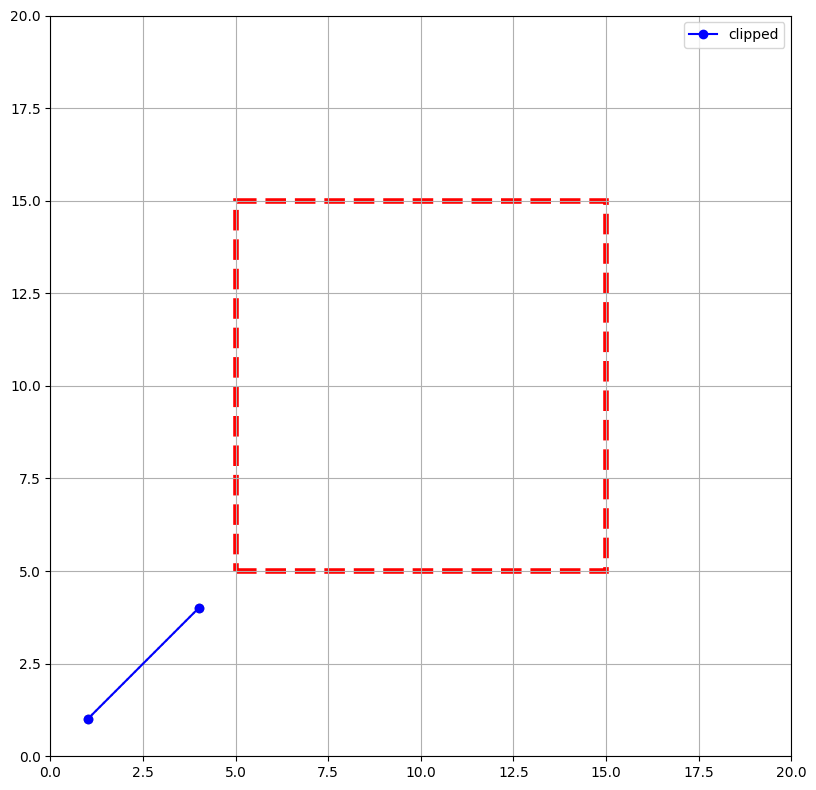

In [25]:
if __name__ == "__main__":
    CLIP_WINDOW = (5, 5, 15, 15)
    line_to_clip = (1, 1, 4, 4)
    line_title = "Single Crossing Line"
    visualize(CLIP_WINDOW, line_to_clip, line_title) 

Accepted


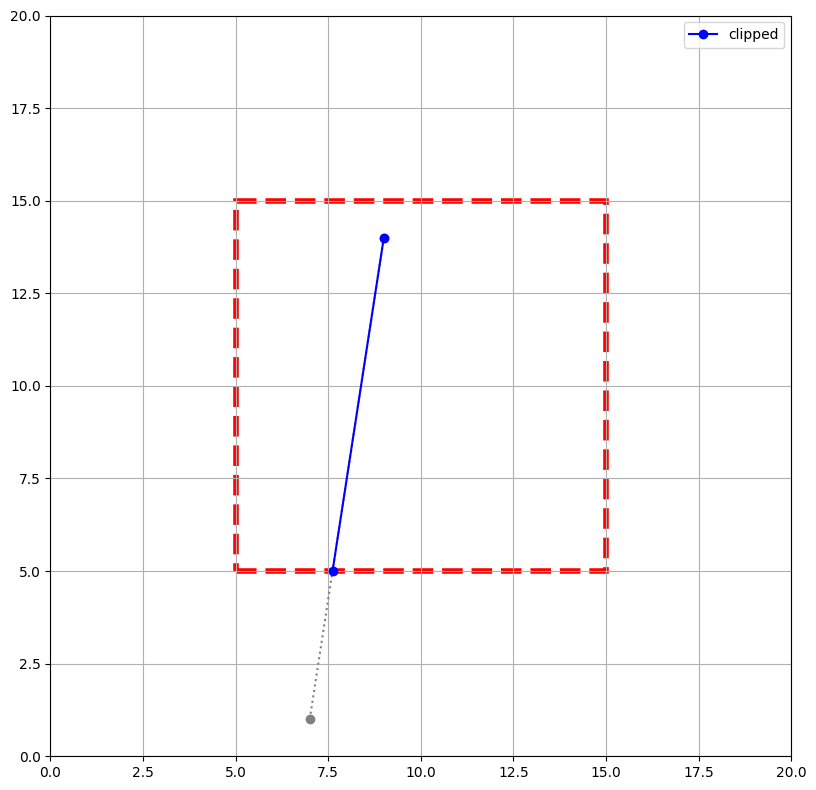

In [26]:
if __name__ == "__main__":
    CLIP_WINDOW = (5, 5, 15, 15)
    line_to_clip = (7, 1, 9, 14)
    line_title = "Single Crossing Line"
    visualize(CLIP_WINDOW, line_to_clip, line_title) 

# 2. Polygon Clipping

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
le, re, be, te = 0,1,2,3

def is_inside(p, edge, clip_window):
    x,y=p
    xmin,ymin,xmax,ymax=clip_window
    if edge==left:
        return x>=xmin
    elif edge==right:
        return x<=xmax
    elif edge==top:
        return y>=ymax
    elif edge==bottom:
        return y<=ymin
    return False
def get_intersection(p1,p2,edge,clip_window):
    x1,y1=p1
    x2,y2=p2
    dx = x2-x1
    dy = y2-y1
    xmin,ymin,xmax,ymax=clip_window
    if edge==left:
        return (xmin, y1+(y2-y1)*(xmin-x1)/(x2-x1) if dx!=0 else y1)
    elif edge==right:
        return (xmax, y1 + (y2-y1)*(xmax-x1)/(x2-x1) if dx!=0 else y1)
    elif edge==bottom:
        return (x1+(x2-x1)*(ymin-y1)/(y2-y1) if dy!=0 else x1, ymin)
    elif edge==top:
        return (x1+(x2-x1)*(ymax-y1)/(y2-y1) if dy!=0 else x1, ymax)

def clip_polygon_aganins_edge(subject_polygon, edge, clip_window):
    output = []
    s = subject_polygon[-1]
    for p in subject_polygon:
        if is_inside(p, edge, clip_window):
            if not is_inside(s, edge, clip_window):
                intersection = get_intersection(s,p,edge, clip_window)
                output.append(intersection)
            output.append(p)
        elif is_inside(s,edge, clip_window):
            intersection = get_intersection(s,p, edge, clip_window)
            output.append(intersection)
        s = p
    return output

def sutherland_hodg(subject_polygon, clipwindow):
    clipped = list(subject_polygon)
    for edge in range(4):
        if not clipped:
            break
        clipped = clip_polygon_aganins_edge(subject_polygon, clipwindow)
    return clipped
def plot_polygon(subject_polygon, clip_window, clip_polygon):
    fig, ax = plt.subplots()

    poly_org = patches.Polygon(subject_polygon, closed=True, edgecolor='blue', facecolor='none', linestyle='--', linewidth=2, label='Original Polygon')
    ax.add_patch(poly_org)

    xmin, ymin, xmax, ymax =clip_window

    rec = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, lw=2, edgecolor='red', facecolor='none', linestyle=':', label='Window')
    ax.add_patch(rec)
    if clip_polygon:
        poly_clipped = patches.Polygon(clip_polygon, closed=True, edgecolor='green', facecolor='green', alpha=0.4, label='Clipped polygon')
        ax.add_patch(poly_clipped)
    ax.set_title("suth")
    ax.legend()
    ax.set_aspect('equal', 'box')
    
    all_points = subject_polygon + list(zip(*[iter([xmin, ymin, xmax, ymax])]*2))
    all_x = [p[0] for p in all_points]
    all_y = [p[1] for p in all_points]
    plt.xlim(min(all_x)-10, max(all_x)+10)
    plt.ylim(min(all_y)-10, max(all_y)+10)

    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    # 1. Define the polygon to be clipped (a triangle)
    subject_polygon =  [(50 , 150) , (200 , 50) , (350 , 150) , (100 , 250) , (200 ,150) ]
    
    # 2. Define the clipping window
    clip_window = (100, 100, 300, 200) # (x_min, y_min, x_max, y_max)
    
    # 3. Perform the clipping
    clipped_polygon = sutherland_hodg(subject_polygon, clip_window)
    
    # 4. Print results and plot
    print("Original Polygon Vertices:", subject_polygon)
    print("Clipped Polygon Vertices:", clipped_polygon)
    
    plot_polygon(subject_polygon, clip_window, clipped_polygon)

TypeError: clip_polygon_aganins_edge() missing 1 required positional argument: 'clip_window'

# 3. Beizer Curve

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb

def beizer_curve(cp, np=100):
    n = len(cp)-1
    cp = np.array(cp, dtype=float)
    c = np.zeros((np, 2))
    u = np.linspace(0,1,np)
    for i in range(n+1):
        bp = comb(n,i)*(u**i)*(1-u)**(n-i)
        c += np.outer(bp, cp[i])
    return c
def plot_beizer_curve(curve, cp):
    plt.figur(figsize=(12,5))
    plt.plot(curve[:,0],curve[:,1],)
cp=[(50,250),(150,-250),(200,250),(250,-250),(300,200),(150,250),(200,180)]
curve = beizer_curve(cp)
plot_beizer_curve(curve, cp)

# 4. Circle

In [ ]:
def cricle_points(xc,yc,x,y, points):
    points.extend([
        (xc+x, yc+y)
    ])

def Bresenham_circle(xc,yc,r):
    x,y=0,r
    d=3-2*r
    points=[]
    while x<=y:
        circle_points(xc,yc,x,y,points)
        if d<0:
            d = d + 4*x + 6
        else:
            d = d+4*(x-y)+10
            y=y-1
        x = x+1
    return points

xc,yc,r = -10, 34, 50
circle_points = Bresenham_circle(xc,yc,r)
x_vals, y_vals = zip(*circle_points)
plt.figure(figsize=(6,6))
plt.scatter(x_vals, y_vals, color='red', s=10)
plt.gca().set_aspect('equal', 'box')
plt.grid(True)
plt.show()



# 5. Line Drawing

In [ ]:
from PIL import Image

def bresenham_line(x0,y0,x1,y1):
    points = []
    dx=abs(x1-x0)
    dy = abs(y1-y0)
    sx = 1 if x0<x1 else -1
    sy = 1 if y0<y1 else -1

    err = dx-dy
    x,y=x0,y0
    while True:
        points.append((x,y))
        if x==x1 and y==y1:
            break
        e2 = 2*err
        if e2>-dy:
            err -= dy
            x += sx
        elif e2<dx:
            err += dx
            y += sy
        x += 1

    return points

w,h=200,200
img = Image.new("RGB", (w,h), 'white')
px = img.load()
line = [(10,10,190,199)]
for (x0,y0,x1,y1) in line:
    for (x,y) in bresenham_line(x0,y0,x1,y1):
        if 0<=x<w and 0<=y<h:
            px[x,y]=(0,0,0)
img.save("be.png")


# 6. Koch Snowflake

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def koch_snow_flake(order, scale=10):
    def initiate(scale):
        p1 = np.array([0,0])
        p2 = np.array([scale, 0])
        p3 = np.array(([scale/2, scale*np.sqrt(3)/2]))
        return np.array([p1,p2,p3,p1])
    def iteration(points):
        np = []
        for i in range(len(points)-1):
            p1 = points[i]
            p2 = points[i+1]

            delta = p2-p1
            pa = p1 + delta
            pb = p1 + delta * 2
            angle = -np.pi/3
            peak = pa + np.array([delta[0]*np.cos(angle) - delta[1]*np.sin(angle),
                                  delta[0]*np.sin(angle) + delta[1]*np.cos(angle)]) 
            np.extend([p1,pa,peak,pb])
        np.append(points[-1])
        return np.array(np)
    points = initiate(scale)
    for _ in range(order):
        points = iteration(points)
    return points
if __name__ == "__main__":
    orders = [0, 1, 2, 3, 4, 5]
    fig, axes = plt.subplots(1, len(orders), figsize=(18, 3))
    for ax, order in zip(axes, orders):
        points = koch_snow_flake(order)
        ax.plot(points[:, 0], points[:, 1], color='blue')
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f'Order {order}')
    plt.tight_layout()
    plt.show()


# Scalling Rotation

In [ ]:
def beizercurve(cp, np):
    cp = np.array(cp, dtype=float)
    c  = np.zeros((np, 2))
    u  = np.linspace(0,1,np)
    n  = len(cp)-1
    for i in range(n+1):
        bn = comb(n,i)(u**i)*(1-u)**(n-i)
        

In [ ]:
def circle(xc,yc,x,y,points):
    points.extend([
        (xc+x,yc+y),
    ])
def Bresen(xc,yc,r):
    x,y=0,r
    d = 3-2*r
    points = []
    while x<=y:
        circle(xc,yc,x,y,points)
        if d<0:
            d = d+4*x+6
        else:
            d = d+4*(x-y)+10
            y = y-1
        x +=1
    return points
xc,yc,r=
circle_points = Bresen(xc,yc,r)
x,y = zip(*circle_points)
